# 1 Weight gain data

### 1.1 Import and see some info about data

In [2]:
# Load data
library(HSAUR3)
data("weightgain", package = "HSAUR3")

In [35]:
# Compactly display data
str(weightgain)

'data.frame':	40 obs. of  3 variables:
 $ source    : Factor w/ 2 levels "Beef","Cereal": 1 1 1 1 1 1 1 1 1 1 ...
 $ type      : Factor w/ 2 levels "High","Low": 2 2 2 2 2 2 2 2 2 2 ...
 $ weightgain: int  90 76 90 64 86 51 72 90 95 78 ...


In [33]:
# See that data is balanced
xtabs(~source+type, data=weightgain)

        type
source   High Low
  Beef     10  10
  Cereal   10  10

In [37]:
# Print data summary
summary(weightgain)

    source     type      weightgain    
 Beef  :20   High:20   Min.   : 51.00  
 Cereal:20   Low :20   1st Qu.: 75.50  
                       Median : 88.50  
                       Mean   : 87.25  
                       3rd Qu.: 98.00  
                       Max.   :118.00  

### 1.2 See mean and sd per group, and check for homoscedasticity

In [6]:
tapply(weightgain$weightgain, list(weightgain$source, weightgain$type), mean)

,High,Low
Beef,100.0,79.2
Cereal,85.9,83.9


In [8]:
tapply(weightgain$weightgain, list(weightgain$source, weightgain$type), sd)

,High,Low
Beef,15.13642,13.88684
Cereal,15.02184,15.70881


*Homoscedasticity: The k populations have the same
variance*

**Does the assumption of homoscedasticity appear to hold for these data?**
Mostly yes

**Do there appear to be differences in mean weight gain for these
two factors?**
Not really, because the differences are similar to the standard deviation.


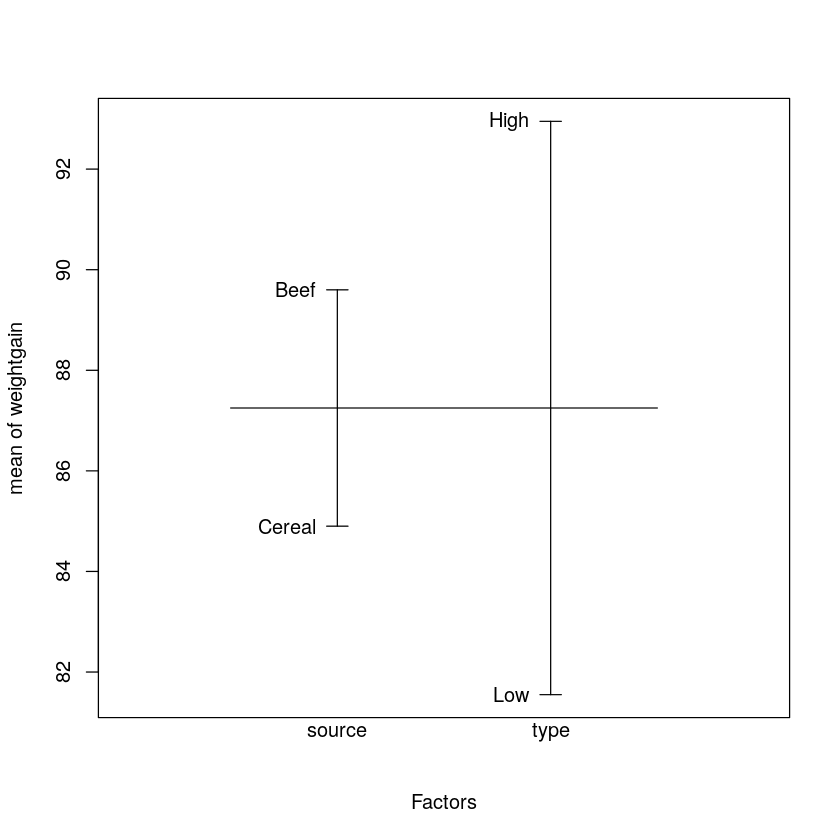

In [9]:
plot.design(weightgain)

###  1.3 Fit ANOVA

Fit an ANOVA model to the data:

`
weightgain ~ source + type + source:type
`

In [14]:
wg.aov <- aov(weightgain ~ source*type, data=weightgain)
summary(wg.aov)

            Df Sum Sq Mean Sq F value Pr(>F)  
source       1    221   220.9   0.988 0.3269  
type         1   1300  1299.6   5.812 0.0211 *
source:type  1    884   883.6   3.952 0.0545 .
Residuals   36   8049   223.6                 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

#### 1.3.1 Treatment contrasts explanation

In [18]:
options("contrasts")In [26]:

$contrasts
        unordered           ordered 
"contr.treatment"      "contr.poly"

**Treatment contrasts** fit with a model where the coefficient for the first level of a model is set to 0. Thus, the interpretation of a given
coefficient is that it estimates the difference between the effect of the first level and the level corresponding to the coefficient. (It is
possible to change this if it makes more practical sense to use a different constraint for your problem \- see the help for contrasts .
Here, treatment contrasts are fine.)

**Treatment contrasts** (`contr.treatment`): The *first* (alphanumeric) factor level is *set to 0* ($\alpha_1=0$)

*Interpretation* of other coefficients ($\alpha_i$) for that factor: represent the effect of level $i$ above the effect of $\alpha_1$ (i.e. $\alpha_i-\alpha_1$)




In [24]:
# get levels for each factor
levels(weightgain$source)
levels(weightgain$type)

[1] "Beef"   "Cereal"

[1] "High" "Low"

#### 1.3.2 Interpret model coefficients

In [15]:
# extract estimated model coefficient
coef(wg.aov)

(Intercept)         sourceCereal              typeLow 
               100.0                -14.1                -20.8 
sourceCereal:typeLow 
                18.8

*Hint: Your interpretation should correspond to the design plot you made.*

Source cereal has a lower mean; type low has a lower mean; when the source is cereal and the type is low, however, due to the interaction between the factors the mean is higher.

### 1.4 Plot interaction term

The interaction term is marginally significant. Examine the interaction graphically by making an interaction plot. Does the plot support the anova results you obtained?

According to the plot, the impact that the type has on the gain is lower when the source is cereal. However, in both cases the gain is lower for _type low_. 

We can also see that the difference is 100-80 for beef, and 86-84 for cereal.


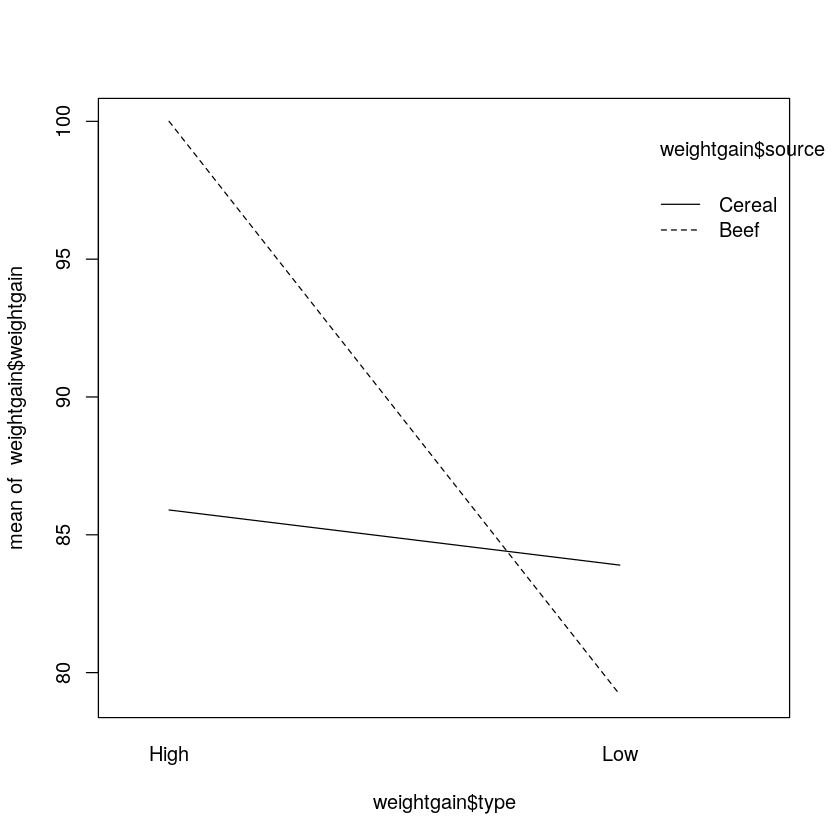

In [26]:
interaction.plot(weightgain$type, weightgain$source, weightgain$weightgain)

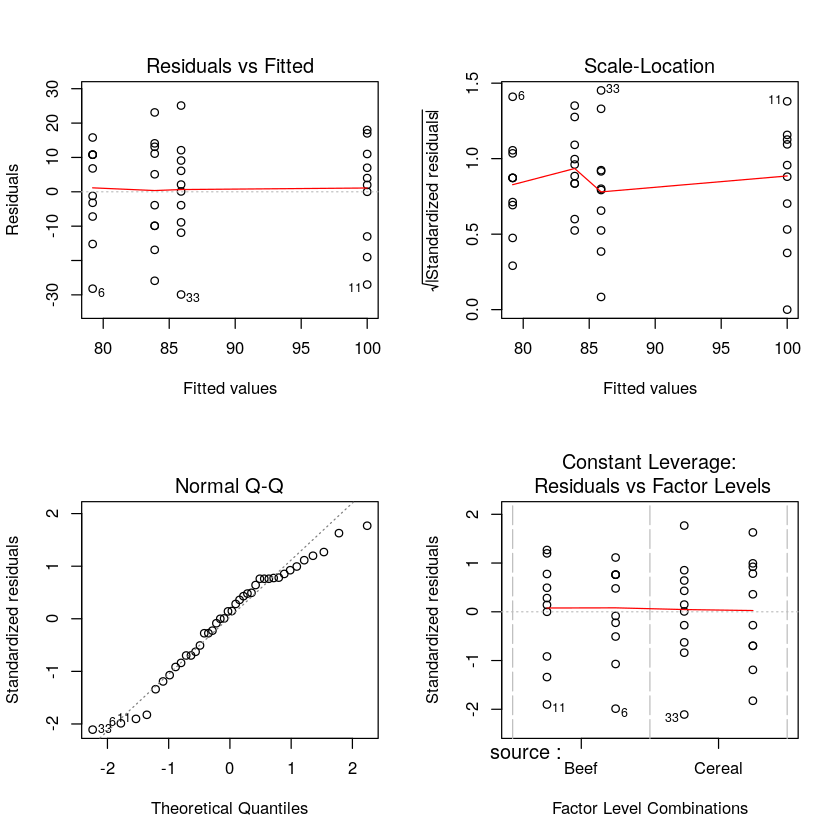

In [31]:
layout(matrix(1:4,ncol=2))
plot(wg.aov)

Normality -- By looking at the Q-Q plot, we can see it's mostly normal

Homoscedasticity -- first plot, we can see that the standardized residuals have a similar variance for all factor combinations (plots in the second column are already standardized, so they give no info on this!)

### 1.5 Summary of findings

Observations are balanced in this case.

The assumptions for applying ANOVA are met: The samples are normally distributed in all populations (seen from Normal Q-Q and the residuals vs fitted plots); homoscedasticity is also met because the variances are nearly the same (can see from residuals vs fitted plots); and we can assume they're independent.

There is no significant interaction between the factors (p-value bigger than 0.05).

The conclusion is that high protein diet results in weight gain independently from the source.

----------------------

# 2 Foster feeding data

### 2.1 Import and see some info about data

In [40]:
# Load data
data("foster", package = "HSAUR3")

In [41]:
# Compactly display data
str(foster)

'data.frame':	61 obs. of  3 variables:
 $ litgen: Factor w/ 4 levels "A","B","I","J": 1 1 1 1 1 1 1 1 1 1 ...
 $ motgen: Factor w/ 4 levels "A","B","I","J": 1 1 1 1 1 2 2 2 3 3 ...
 $ weight: num  61.5 68.2 64 65 59.7 55 42 60.2 52.5 61.8 ...


In [42]:
# See that data is unbalanced
xtabs(~litgen+motgen, data=foster)

      motgen
litgen A B I J
     A 5 3 4 5
     B 4 5 4 2
     I 3 3 5 3
     J 4 3 3 5

In [47]:
# Print data summary
summary(foster)

 litgen motgen     weight     
 A:17   A:16   Min.   :36.30  
 B:15   B:14   1st Qu.:48.20  
 I:14   I:16   Median :54.00  
 J:15   J:15   Mean   :53.97  
               3rd Qu.:60.30  
               Max.   :69.80  

### 2.2 See mean and sd per group, and check for homoscedasticity

In [48]:
tapply(foster$weight, list(foster$litgen, foster$motgen), mean)

,A,B,I,J
A,63.680,52.40000,54.12500,48.96000
B,52.325,60.64000,53.92500,45.90000
I,47.100,64.36667,51.60000,49.43333
J,54.350,56.10000,54.53333,49.06000


In [49]:
tapply(foster$weight, list(foster$litgen, foster$motgen), sd)

,A,B,I,J
A,3.273683,9.374433,5.321889,8.760594
B,5.533158,5.647389,5.114277,7.636753
I,18.103315,7.124839,8.624964,5.372461
J,5.325098,3.351119,8.376953,5.335541


*Homoscedasticity: The k populations have the same
variance*

**Does the assumption of homoscedasticity appear to hold for these data?**
No, look for example at (I,A)

**Do there appear to be differences in mean weight gain for these
two factors?**
Yes, but it's not easy to tell if they're significantly different.


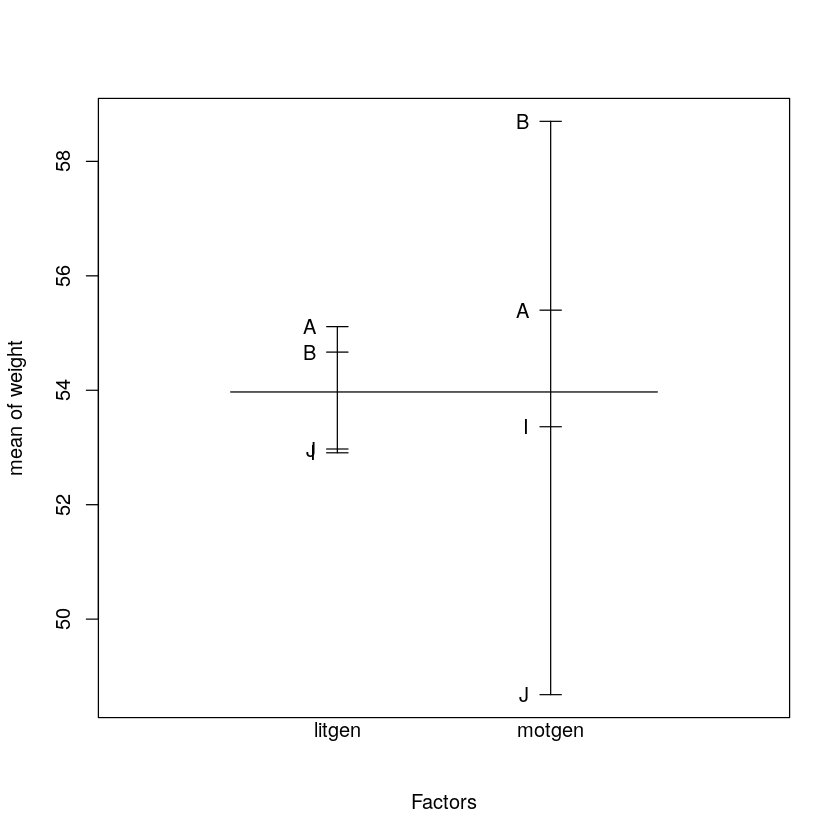

In [50]:
plot.design(foster)

Seems like `motgen` is going to have a greater effect on the weight than `litgen`.

###  2.3 Fit ANOVA

#### 2.3.1 Fit first ANOVA

In [51]:
model.1 <- aov(weight ~ litgen * motgen, data = foster)
summary(model.1)

              Df Sum Sq Mean Sq F value  Pr(>F)   
litgen         3   60.2   20.05   0.370 0.77522   
motgen         3  775.1  258.36   4.763 0.00574 **
litgen:motgen  9  824.1   91.56   1.688 0.12005   
Residuals     45 2440.8   54.24                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

In [53]:
# extract estimated model coefficients
coef(model.1)

(Intercept)         litgenB         litgenI         litgenJ         motgenB 
      63.680000      -11.355000      -16.580000       -9.330000      -11.280000 
        motgenI         motgenJ litgenB:motgenB litgenI:motgenB litgenJ:motgenB 
      -9.555000      -14.720000       19.595000       28.546667       13.030000 
litgenB:motgenI litgenI:motgenI litgenJ:motgenI litgenB:motgenJ litgenI:motgenJ 
      11.155000       14.055000        9.738333        8.295000       17.053333 
litgenJ:motgenJ 
       9.430000

#### 2.3.2 Fit second ANOVA

In [52]:
model.2 <- aov(weight ~ motgen * litgen, data = foster)
summary(model.2)

              Df Sum Sq Mean Sq F value  Pr(>F)   
motgen         3  771.6  257.20   4.742 0.00587 **
litgen         3   63.6   21.21   0.391 0.76000   
motgen:litgen  9  824.1   91.56   1.688 0.12005   
Residuals     45 2440.8   54.24                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

In [54]:
# extract estimated model coefficients
coef(model.2)

(Intercept)         motgenB         motgenI         motgenJ         litgenB 
      63.680000      -11.280000       -9.555000      -14.720000      -11.355000 
        litgenI         litgenJ motgenB:litgenB motgenI:litgenB motgenJ:litgenB 
     -16.580000       -9.330000       19.595000       11.155000        8.295000 
motgenB:litgenI motgenI:litgenI motgenJ:litgenI motgenB:litgenJ motgenI:litgenJ 
      28.546667       14.055000       17.053333       13.030000        9.738333 
motgenJ:litgenJ 
       9.430000

Are there large differences between the anova results for the 2 models? Not really (see below)

Are there any significant effects? Yes, `motgen`

`
(Intercept) 63.68
motgenB
-11.28
motgenI
-9.555
motgenJ
-14.72
litgenB
-11.355
litgenI
-16.58
litgenJ
-9.32999999999999
litgenB:motgenB
19.595
litgenB:motgenI
11.155
litgenB:motgenJ
8.295
litgenI:motgenB
28.5466666666666
litgenI:motgenI
14.055
litgenI:motgenJ
17.0533333333333
litgenJ:motgenB
13.03
litgenJ:motgenI
9.73833333333333
litgenJ:motgenJ
9.42999999999999
`

`
(Intercept)
63.68
motgenB
-11.28
motgenI
-9.55500000000001
motgenJ
-14.72
litgenB
-11.355
litgenI
-16.58
litgenJ
-9.33000000000001
motgenB:litgenB
19.595
motgenI:litgenB
11.155
motgenJ:litgenB
8.295
motgenB:litgenI
28.5466666666667
motgenI:litgenI
14.055
motgenJ:litgenI
17.0533333333333
motgenB:litgenJ
13.03
motgenI:litgenJ
9.73833333333334
motgenJ:litgenJ
9.42999999999999`

In [58]:
foster.hsd <- TukeyHSD(model.1, "motgen")
foster.hsd

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = weight ~ litgen * motgen, data = foster)

$motgen
         diff        lwr        upr     p adj
B-A  3.330369  -3.859729 10.5204672 0.6078581
I-A -1.895574  -8.841869  5.0507207 0.8853702
J-A -6.566168 -13.627285  0.4949498 0.0767540
I-B -5.225943 -12.416041  1.9641552 0.2266493
J-B -9.896537 -17.197624 -2.5954489 0.0040509
J-I -4.670593 -11.731711  2.3905240 0.3035490


In [59]:
help(TukeyHSD)

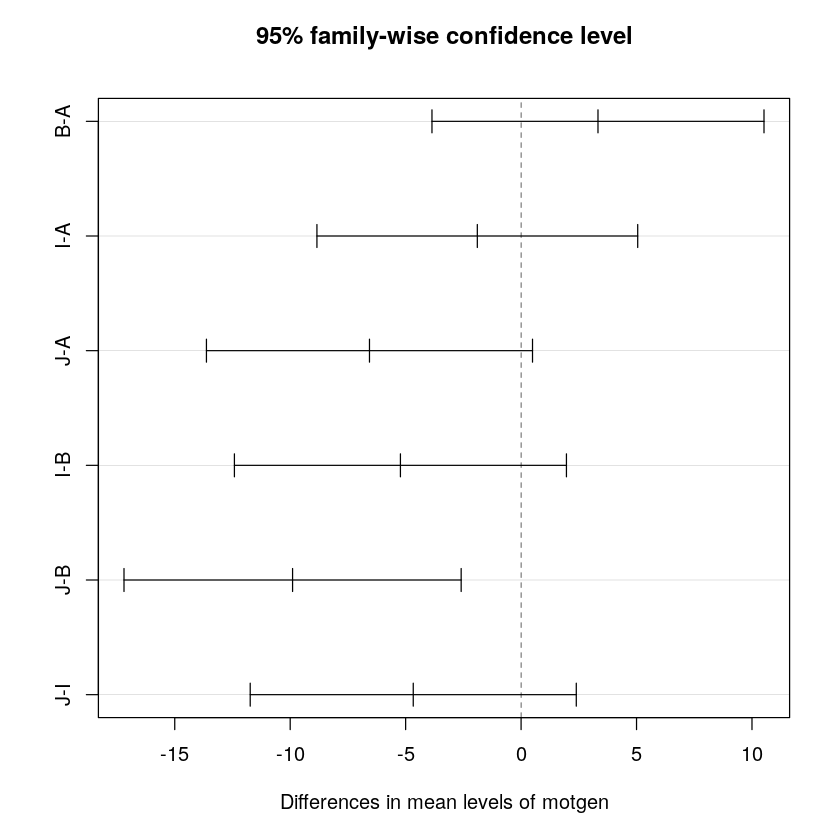

In [56]:
plot(foster.hsd)

In this case the p-values give the significance level at which 0 is included, ie there is no difference in means. It is only different for J-B, although for J-A it's almost the case too.